## Monte Carlo Simulation for Demand Risk Management

Monte Carlo simulations can be used to quantify and minimize the risk of fluctuating demand on inventory levels, production schedules, and profitability. Here is an example of how this could be applied in a data storage company.

**Scenario**:

We want to analyze the impact of different demand scenarios on inventory levels, production schedules, and profitability over the next quarter. The Key variables include:

* Demand: Uncertain and can very each month.
* Production Capacity: Fixed, but can adjust schedules based on demand.
* Inventory Costs: Holding too much or too little inventory has cost implications.
* Profit Margins: Impacted by sales vales volume, production costs, and inventory levels.

**Steps to Implement Monte Carlo Simulation**

* 1. Define the variables:
 
     - Demand: Assume demand follows a normal distribution with a mean ($\mu$) and standard deviation ($\sigma$) based on historical data.
     - Production Capacity: Fixed number of units per month.
     - Inventory Costs: Include both holding costs and stockout costs.
     - Profit Margins: Dependent on the number of units sold and cost per unit.
 
* 2. Set up the Simulation:
 
     - Run multiple simulations where demand varies each month.
     - Adjust production schedules dynamically based on simulated demand.
     - Track inventory levels, costs, and profitability across all simulations.
 

* 3. Analyze the Results:
 
     - Assess the risk of stockouts, excess inventory, and impact on profitability.
     - Identify strategies to minimize these risks (e.g., adjusting safety stock levels, flexible production scheduling).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_simulations = 10000
months = 3
initial_inventory = 1000
production_capacity = 800
holding_cost_per_unit = 2
stockout_cost_per_unit = 10
profit_margin_per_unit = 50 

In [3]:
# Demand parameter 
demand_mean = 900
demand_std_dev = 100

In [4]:
# Arrays to store results
profitability = []
ending_inventory = []

In [8]:
for _ in range(num_simulations):
    inventory = initial_inventory
    total_profit = 0
    
    for month in range(months):
        # Simulate demand
        demand = np.random.normal(demand_mean, demand_std_dev)
        
        # Production decision
        production = production_capacity
        
        # Inventory management
        inventory += production - demand
        
        # Calculate costs
        if inventory < 0:  # Stockout scenario
            stockout_cost = -inventory * stockout_cost_per_unit
            total_profit -= stockout_cost
            inventory = 0  # Reset inventory to 0 since stockout occurred
        else:
            holding_cost = inventory * holding_cost_per_unit
            total_profit -= holding_cost
        
        # Calculate profit for the month
        sales = min(demand, production + inventory)
        monthly_profit = sales * profit_margin_per_unit
        total_profit += monthly_profit
    
    # Store results
    profitability.append(total_profit)
    ending_inventory.append(inventory)

In [14]:
# Convert results to numpy arrays for analysis
profitability = np.array(profitability)
ending_inventory = np.array(ending_inventory)

In [15]:
# analyze the results
average_profit = np.mean(profitability)
risk_of_stockouts = np.sum(ending_inventory<0)/num_simulations
average_ending_inventory = np.mean(ending_inventory)

In [16]:
print(f"Average Profit: ${average_profit:.2f}")
print(f"Risk of Stockouts: {risk_of_stockouts:.2%}")
print(f"Average Ending Inventory: {average_ending_inventory:.2f} units")

Average Profit: $130093.79
Risk of Stockouts: 0.00%
Average Ending Inventory: 701.42 units


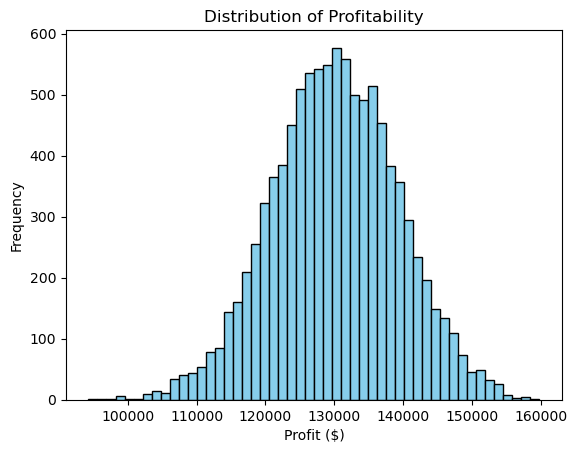

In [17]:
# Visualize the distribution of profitability
plt.hist(profitability, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Profitability")
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.show()

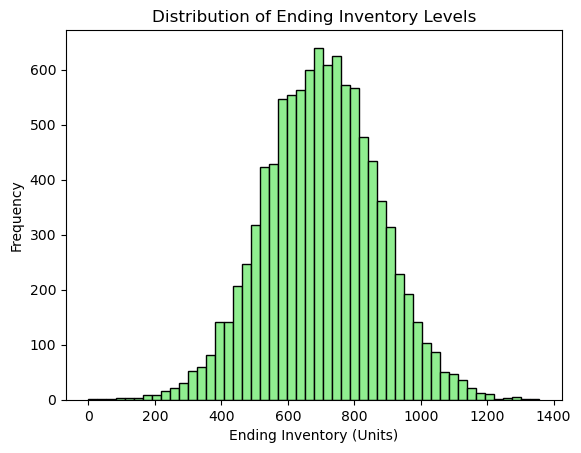

In [18]:
# Visualize the ending inventory distribution
plt.hist(ending_inventory, bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Ending Inventory Levels")
plt.xlabel("Ending Inventory (Units)")
plt.ylabel("Frequency")
plt.show()

## Summarize:

* 1. Simulation Setup:
 
     - Simulate demand over three months, assuming it following a normal distribution.
     - Production is fixed, but inventory levels fluctuate based on demand.
     - Costs are incurred based on holding excess inventory or running into stockouts.
    
* 2. Profit Calculation:
 
     - Profit is calculated based on units sold minus costs (holding and stockout costs)
     - The simulation runs 10000 iterations to account for various demand scenarios.

* 3. Results Analysis:

     - Average Profit: Helps assess the xpected profitability under uncertain demand.
     - Risk of Stockouts: Indicates how often the company might run out of stock, leading to lost sales and customer dissatisfaction.
     - Average Ending Inventory: Provides insights into how much inventory is typically left at the end of the period.

## Insights:

* **Stockout Risk**: If the risk of stockouts is high, we might consider increasing safety stock levels or adjusting production schedules.
  
* **Profitability Distribution**: The spread of profitability gives an idea of the variability in financial outcomes, helping in financial planning.
  
* **Inventory Management**: The distribution of ending inventory levels helps refining inventory polices to minimize holding costs while avoiding stockouts.
  

## Strategy Recommendations:

* **Flexible Production Schedules**: Consider implementing more flexible production schedules that can be adjusted dynamically based on real-time demand data.

* **Safety Stock Adjustments**: Use the simulation to determine optimal safety stock levels that balance the costs of holding inventory against the risk of stockouts.

* **Scenario Planning**: Regularly update the simulation with new data to reflect changes in demand patterns, ensuring that the company’s risk management strategies remain effective.